

# <center><b>Aviation Accident Analysis<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- The odds of a **commercial airline flight fatality** are actually **as low as 9 million to 1**.

- That said, a lot can go wrong at **33,000 feet (10,058.4 m)** above the ground, and if you’re unlucky enough to be aboard when something does, the decisions you make could mean the difference between life and death.

<center><img src="https://thumbs.dreamstime.com/b/isometric-plane-crash-ditched-20382935.jpg" width=50%></center>

- **Almost 95% of airplane crashes have survivors**, so even if the worst does happen, your odds aren't as bad as you might think.

<center><img src="https://thumbs.gfycat.com/PartialScarceGalapagospenguin-size_restricted.gif" alt="Credits: Shemaroo Entertainment Ltd."></center>

- In this notebook, we will see a highly descriptive overview of **aviation crashes** using a historic dataset.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The Aviation Institue** (TIA) is a newly organized committee for aviation regulations. 

- They want to **analyze** and **compare** the number of **aviation incidents** over the a **century worth** of observed crashes data

<center><img src="https://png.pngitem.com/pimgs/s/5-57201_aircraft-clipart-airplane-wing-silhouette-transparent-background-airplane.png" width=50%></center>

- To do so, they have hired your company - a data analytics firm.

- You are leading the team who has been tasked with analysis of the project.

- The Institue has provided a dataset that contains data of **airplane accidents** involving **civil**, **commercial** and **military** transport worldwide **from 1908-09-17** to **2009-06-08**.

<a name = Section33></a>
### **3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt                                     # A popular plotting library used along with pandas
import seaborn as sns                                               # A library, built on matplotlib, for beautiful plots
import plotly.graph_objs as go                                      # For interactive graphs
import plotly.express as px                                         # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import random                                                       # To shuffle lists
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from PIL import Image                                               # To import an image
#-------------------------------------------------------------------------------------------------------------------------------
from wordcloud import WordCloud                                     # To create wordclouds
from wordcloud import STOPWORDS                                     # To import a list of stopwords that remove unnecessary unicode text
#-------------------------------------------------------------------------------------------------------------------------------
from datetime import date, timedelta, datetime                      # To use timeseries data

C:\Users\pynea\AppData\Local\Temp\ipykernel_15268\821389498.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                          # To perform data profiling


---
<a name = Section4></a>
# **4. Data Acquisition & Wrangling**
---

- A high level overview of the dataset:

|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
| Aviation Accident Analysis | 5268 | 13 | 1.52 MB |

<br>

- The dataset consists of the following features:

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**Date**| Date of accident, in the format - January 01, 2001 |
|2|**Time**| Local time, in 24 hr. format unless otherwise specified |
|3|**Location**| Location of the accident |
|4|**Operator**| Airline or operator of the aircraft |
|5|**Flight #**| Flight number assigned by the aircraft operator |
|6|**Route**| Complete or partial route flown prior to the accident |
|7|**Type**| Aircraft type |
|8|**Registration**| ICAO registration of the aircraft |
|9|**cn/In**| Construction or serial number / Line or fuselage number |
|10|**Aboard**| Total aboard (passengers / crew) |
|11|**Fatalities**| Total fatalities aboard (passengers / crew) |
|12|**Ground**| Total fatalities on the ground |
|13|**Summary**| Brief description of the accident and cause if known |



In [2]:
data = pd.read_csv('data.csv')
print('Dataset Shape:', data.shape)
data.head()

Dataset Shape: (5268, 13)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [3]:
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


**Observations:**

- **Aboard** ranges from **0.0** to **644.0**, averaging at **27.55**.

- **Fatalities** ranges from **0.0** to **583.0**, averaging at **20.07**.

- **Ground** ranges from **0.0** to **2750.0**, averaging at **1.61**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


**Observations:**

- There are **3 float64 features** and **10 object data type** features.

- We will see the **profiling report** to get more information on these features.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

- For quick analysis pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [5]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [6]:
profile

**Observations:**

- There are **3 numeric** and **10 categorical features**, according to the pre-profiling report.

- There are **no duplicate rows** present in the dataset.

- There are 10198 (14.9%) missing cells in the dataset, most of which are from `Time` and `Flight #` features.



- **Fatalities** has **58 (1.1%) zeros**. We will **retain** this data.

- **Ground** has **5027 (95.4%) zeros**. We can drop this column

In [7]:
data.isna().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

**Observations:**

- **All the features** except Date have **missing cells** to a certain degree.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations on the data using information from the previous section.

- We have to **clean the Time feature** extensively.

- We will also conver the **Date feature** to appropriate type and extract **Year**, **Month**, and **day** features from it.

- Next, we will convert all the strings in **Operator** feature to **uppercase** to  avoid confusion.

- Finally, we will **drop the Ground feature**.

In [8]:
list(data.Time.value_counts().index)[500:]

['17:48',
 '04:42',
 '18:41',
 '04:11',
 '02:56',
 '11:07',
 '20:47',
 '19:23',
 '02:19',
 '20:18',
 '23:42',
 '02:07',
 'c:09:00',
 '18:23',
 '09:18',
 '02:04',
 '21:27',
 '23:13',
 '11:03',
 '12:18',
 '02:09',
 '09:19',
 '19:19',
 '00:57',
 '09:38',
 '08:12',
 '21:13',
 '07:42',
 '00:08',
 '16:04',
 '15:06',
 '06:40',
 '16:58',
 '02:25',
 '21:16',
 '01:14',
 '16:01',
 '11:58',
 '15:29',
 '16:13',
 '16:42',
 '21:42',
 '12:35',
 '17:43',
 '23:07',
 '15:16',
 '21:24',
 '07:16',
 '10:22',
 '18:22',
 '15:38',
 '21:41',
 '03:55',
 '20:48',
 '14:39',
 '19:42',
 '11:36',
 '22:24',
 '12:37',
 '21:12',
 '12:31',
 '12:24',
 '23:37',
 '12:52',
 '23:57',
 '01:20',
 '20:32',
 '00:23',
 '10:23',
 '03:03',
 '15:54',
 '1:00',
 '17:13',
 '22:18',
 '13:22',
 '17:47',
 '06:13',
 '13:59',
 '05:19',
 '18:56',
 '07:58',
 '18:34',
 '18:03',
 '20:16',
 '22:50',
 '07:38',
 '08:27',
 '11:22',
 '17:08',
 '13:56',
 '05:50',
 '22:41',
 '04:44',
 '09:17',
 '07:46',
 '11:11',
 '15:22',
 '06:32',
 '22:59',
 '18:59',

In [9]:
data[['Date','Time']]

,Date,Time
0,09/17/1908,17:18
1,07/12/1912,06:30
2,08/06/1913,NaN
3,09/09/1913,18:30
4,10/17/1913,10:30
...,...,...
5263,05/20/2009,06:30
5264,05/26/2009,NaN
5265,06/01/2009,00:15
5266,06/07/2009,08:30


In [10]:
data['Time'] = data['Time'].replace(np.nan, '00:00') 
data['Time'] = data['Time'].str.replace('c: ', '')
data['Time'] = data['Time'].str.replace('c:', '')
data['Time'] = data['Time'].str.replace('c', '')
data['Time'] = data['Time'].str.replace('12\'20', '12:20')
data['Time'] = data['Time'].str.replace('18.40', '18:40')
data['Time'] = data['Time'].str.replace('0943', '09:43')
data['Time'] = data['Time'].str.replace('22\'08', '22:08')

# is it 11:20 or 14:20 or smth else? Unsure, so replacing with 00:00
data['Time'] = data['Time'].str.replace('114:20', '00:00')      

# joining two rows
data['Time'] = data['Date'] + ' ' + data['Time']
data['Time']


0       09/17/1908 17:18
1       07/12/1912 06:30
2       08/06/1913 00:00
3       09/09/1913 18:30
4       10/17/1913 10:30
              ...       
5263    05/20/2009 06:30
5264    05/26/2009 00:00
5265    06/01/2009 00:15
5266    06/07/2009 08:30
5267    06/08/2009 00:00
Name: Time, Length: 5268, dtype: object

In [11]:
pd.to_datetime(data.Time)

0      1908-09-17 17:18:00
1      1912-07-12 06:30:00
2      1913-08-06 00:00:00
3      1913-09-09 18:30:00
4      1913-10-17 10:30:00
               ...        
5263   2009-05-20 06:30:00
5264   2009-05-26 00:00:00
5265   2009-06-01 00:15:00
5266   2009-06-07 08:30:00
5267   2009-06-08 00:00:00
Name: Time, Length: 5268, dtype: datetime64[ns]

In [12]:

data['Time'] = pd.to_datetime((data['Time']))
# converting the date into datetime format
# data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['Time'].dt.year

# extracting the month from the date
data['Month'] = data['Time'].dt.month

# extracting the days from the date
data['day'] = data['Time'].dt.day



In [13]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,day
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,9
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,17


In [14]:
# to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'
data.Operator = data.Operator.str.upper()

# Dropping the ground feature
data.drop(['Ground'], axis=1, inplace=True)

data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Summary,Year,Month,day
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,The first fatal airplane accident in Canada oc...,1913,8,6
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,The airship flew into a thunderstorm and encou...,1913,9,9
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,Hydrogen gas which was being vented was sucked...,1913,10,17


<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')
profile

Output hidden; open in https://colab.research.google.com to view.

**Observations**:

- We still have around **8000 missing cells**, but we don't want to lose important information.

- We have **dropped the Ground feature**.

- We now have some **new columns**, obtained from **date feature**.

- **Fatalities** is **highly correlated** to **Aboard**.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

**<h4>Question:** How many crashes have happened over the years?</h4>

In [15]:
data.groupby(data['Year'])[['Date']].count()

,Date
Year,
1908,1
1912,1
1913,3
1915,2
1916,5
...,...
2005,51
2006,49
2007,54


In [16]:
temp = data.groupby('Year')[['Date']].count()
temp

,Date
Year,
1908,1
1912,1
1913,3
1915,2
1916,5
...,...
2005,51
2006,49
2007,54


In [17]:
temp = temp.rename(columns={"Date": "Count"})
temp

,Count
Year,
1908,1
1912,1
1913,3
1915,2
1916,5
...,...
2005,51
2006,49
2007,54


In [18]:
temp['Date'] = temp.index
temp.head()

,Count,Date
Year,,
1908,1,1908
1912,1,1912
1913,3,1913
1915,2,1915
1916,5,1916


In [20]:
fig = px.line(temp, y='Count', hover_data=['Date', 'Count'], markers=True)
fig.show()

**Observations**:

- We can observe that the number of crashes peaked in 1972 with 104 crashes.

- The number of crashes **after 1972** have sustained **below 100**, with minimum crashes in 1983.

- We need to observe here that **number of airlines** have kept on **increasing** over the years, and yet the number of **crashes are consistent**.

- This can be a sign to **reduction** in overall **number of crashes** over the years.

**<h4>Question:** Compare and contrast number of crashes and number of fatalities?</h4>

In [21]:
temp2 = data.groupby(data.Time.dt.year)[['Fatalities']].sum()
temp2 = temp2.rename(columns={"Fatalities": "Count"})

temp1 = data.groupby(data.Time.dt.year)[['Date']].count()
temp1 = temp1.rename(columns={"Date": "Count"})

temp1

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5
...,...
2005,51
2006,49
2007,54


In [22]:
crash_data = go.Scatter(x=temp1.index,
                        y=temp1['Count'],
                        mode='lines+markers',
                        name="Crashes")

fatalities_data = go.Scatter(x=temp2.index,
                        y=temp2['Count'],
                        mode='lines+markers',
                        yaxis='y2',
                        name="Fatalities")

layout = go.Layout(title='Number of crashes in contrast to number of fatalities',
                   xaxis={'title':'Date'},
                   yaxis={'title':'Fatalities', 'color':'red'},
                   yaxis2={'title':'Crashes', 'color':'blue', 'overlaying':'y', 'side':'right'})

fig = go.Figure(data=[crash_data, fatalities_data], layout=layout)
fig.show()

**Observations**:

- In most of the years, the **number of fatalities** is **consistent** with **number of crashes**.

- Even though the graph shows that **fatalities increase**, if we had enough data like **number of passengers** over the years that used air transport, we can check the **true rate of fatalities**.

**<h4>Question:** What is the distribution of different types of aircraft in the dataset?</h4>

In [23]:
temp = data.copy()

In [24]:
temp['isMilitary'] = temp.Operator.str.contains('MILITARY')

In [25]:
temp.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Summary,Year,Month,day,isMilitary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,True
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,True
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,The first fatal airplane accident in Canada oc...,1913,8,6,False
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,The airship flew into a thunderstorm and encou...,1913,9,9,True
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,Hydrogen gas which was being vented was sucked...,1913,10,17,True


In [27]:
temp['isMilitary'].value_counts()

False    4469
True      781
Name: isMilitary, dtype: int64

In [26]:
values = temp['isMilitary'].value_counts().values
values

array([4469,  781], dtype=int64)

In [28]:
# temp = data.copy()


# a pie chart to represent the sentiments of the patients

values = temp['isMilitary'].value_counts().values
labels = ['Passenger', 'Military']
colors = ['darkorange', 'slateblue']

# Initiate an empty figure
fig = go.Figure()

# Add a trace of pie to the figure
fig.add_trace(trace=go.Pie(labels=labels, 
                           values=values,
                           pull=[0, 0.2]))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1000, 
                  title_text='Pie Chart of Types of Flights',
                  title_x=0.5)

fig.update_traces(textfont_size=12,
                  marker=dict(line=dict(color='#000000',
                                        width=2),
                              colors=colors))

# Display the figure
fig.show()

**Observations**:

- Most of the crashes are from passenger airlines. This indicates 2 scenarios:

    1. The **number of military** **aircrafts crashing** has **decreased over-time**. But we cannot assume that since we do not data of number of military aircrafts used.

    2. The **number of military** aircrafts that are used is **significantly lower** than passenger aircrafts.

**<h4>Question:** Which type of aircrafts have crashed more over the years in the dataset?</h4>

In [34]:
temp2 = data.copy()
temp2['Military'] = temp2['Operator'].str.contains('MILITARY')
temp2.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Summary,Year,Month,day,Military
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,True
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,True
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,The first fatal airplane accident in Canada oc...,1913,8,6,False
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,The airship flew into a thunderstorm and encou...,1913,9,9,True
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,Hydrogen gas which was being vented was sucked...,1913,10,17,True


In [35]:
temp2['Passenger'] = temp2['Military'] == False
temp2.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Summary,Year,Month,day,Military,Passenger
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,True,False
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,True,False
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,The first fatal airplane accident in Canada oc...,1913,8,6,False,True
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,The airship flew into a thunderstorm and encou...,1913,9,9,True,False
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,Hydrogen gas which was being vented was sucked...,1913,10,17,True,False


In [36]:
temp2 = temp2.loc[:, ['Year', 'Military', 'Passenger']]
temp2.head()

,Year,Military,Passenger
0,1908,True,False
1,1912,True,False
2,1913,False,True
3,1913,True,False
4,1913,True,False


In [47]:
temp2 = temp2.groupby(temp2['Year'])[['Military', 'Passenger']].aggregate(np.count_nonzero)
temp2

,Military,Passenger
Year,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0
...,...,...
2005,7,44
2006,12,37
2007,6,48


In [29]:


colors = ['yellowgreen', 'lightskyblue']

plot_data = [
    go.Scatter(
        x=temp2.index,
        y=temp2['Military'],
        name = 'Military',
        mode='lines+markers'
    ),
    go.Scatter(
        x=temp2.index,
        y=temp2['Passenger'],
        name = 'Passenger',
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Plane Types'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)

fig.update_traces(marker_color=colors)

fig.show()

**Observations**:

- The **number of military aircrafts** actually have less number of crashes with a notable **exception** being in **1945** (can it be concerning World War 2?)

- We can also consider the possibility that military craft crashes are **not officially reported** now so the data available is less.

**<h4>Question:** Which months were more likely to see more number of crashes?</h4>

In [48]:
# Extract labels and values of top rated drugs
values = data['Month'].value_counts().index
labels = data['Month'].value_counts().values
colors = ['blue', 'red', 'yellow', 'green', 'cornsilk', 'grey', 'darkorange', 'purple', 'burlywood', 'magenta', 'mediumturquoise', 'lightgreen']

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels))

# Update the layout with some cosmetics

fig.update_layout(height=600, 
                  width=1200, 
                  title_text='The No. of crashes each Month, over the years', 
                  title_x=0.5, 
                  xaxis_title='Month', 
                  yaxis_title='Number of Crashes',
                  xaxis = dict(tickmode = 'array',
                               tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                               ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
                  )

fig.update_traces(marker_color=colors, marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)

# Display the figure
fig.show()

**Observations**:

- The winter months - December and January have seen the most number of crashes.

- Many reasons can be responsible like **heavy snow** and **fog** causing **less visibility** or causing a **component to fail** due to extreme weather conditions. 

- This is followed by March and August. We can't see any relation just yet.

**<h4>Question:** Which operators have seen the most number of crashes?</h4>

In [49]:
data.groupby('Operator')[['Operator']].count()

,Operator
Operator,
A B AEROTRANSPORT,2
AAXICO AIRLINES,3
AB AEROTRANSPORT,3
ABABEEL AVIAITION,1
ABAKAN AIRLINES,1
...,...
ZANEX,1
ZANTOP AIR TRANSPORT,4
ZANTOP AIRWAYS,1


In [50]:
# Extracting values from Operator feature
data['Operator'] = data['Operator'].str.upper()
data['Operator'] = data['Operator'].replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

total_by_Op = data.groupby('Operator')[['Operator']].count()
total_by_Op = total_by_Op.rename(columns={"Operator": "Count"})
total_by_Op = total_by_Op.sort_values(by='Count', ascending=False).head(15)

# Extract labels and values of top operators
values = total_by_Op['Count']
labels = total_by_Op.index
colors = ['blue', 'red', 'yellow', 'green', 'cornsilk', 'grey', 'darkorange', 'purple', 'burlywood', 'magenta', 'mediumturquoise', 'lightgreen', 'gold', 'violet', 'brown']
random.shuffle(colors)

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels,
                           orientation='h'))

# Update the layout with some cosmetics

fig.update_layout(height=600, 
                  width=1200, 
                  title_text='Total Count by Opeartor', 
                  title_x=0.5, 
                  xaxis_title='Count', 
                  yaxis_title='Operator'
                  )

fig.update_traces(marker_color=colors,
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.6)

# Display the figure
fig.show()

**Observations**:

- **AEROFLOT** and **US Air Force** have seen the most number of crashes, with **more than 150 crashes each**.

- You can find more information about the **Russian Airline Operator - AEROFLOT** at this [**link**](https://en.wikipedia.org/wiki/Aeroflot).

- Other passenger airlines include [**Air France**](https://en.wikipedia.org/wiki/Air_France) and [**Deutsche Lufthansa**](https://en.wikipedia.org/wiki/Lufthansa) with **over 50 crashes** overall.

**<h4>Question:** Which operators has experienced the most number of fatalities?</h4>

In [51]:
data.groupby('Operator')[['Fatalities']].sum()

,Fatalities
Operator,
AAXICO AIRLINES,9.0
AB AEROTRANSPORT,61.0
ABABEEL AVIAITION,4.0
ABAKAN AIRLINES,3.0
ACA-ANCARGO,44.0
...,...
ZANEX,1.0
ZANTOP AIR TRANSPORT,13.0
ZANTOP AIRWAYS,2.0


In [52]:
prop_by_Op = data.groupby('Operator')[['Fatalities']].sum()
prop_by_Op = prop_by_Op.rename(columns={"Operator": "Fatalities"})
prop_by_Op = prop_by_Op.sort_values(by='Fatalities', ascending=False)
prop_by_OpTOP = prop_by_Op.head(15)

# Extract labels and values of top operators
values = prop_by_OpTOP['Fatalities']
labels = prop_by_Op.index
colors = ['blue', 'red', 'yellow', 'green', 'cornsilk', 'grey', 'darkorange', 'purple', 'burlywood', 'magenta', 'mediumturquoise', 'lightgreen', 'gold', 'violet', 'brown']
random.shuffle(colors)

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels,
                           orientation='h'))

# Update the layout with some cosmetics

fig.update_layout(height=600, 
                  width=1200, 
                  title_text='Total Fatalities by Opeartor', 
                  title_x=0.5, 
                  xaxis_title='Count', 
                  yaxis_title='Operator'
                  )

fig.update_traces(marker_color=colors,
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.6)

# Display the figure
fig.show()

**Observations**:

- **AEROFLOT** and **US Air Force** have seen the most number of fatalities as well.

- **Aeroflot** has **7156 fatalities**, whereas **US Air Force** has **3717 fatalities**.

- **Air France** follows up with **1700 casualties**, whereas the **rest** of the airlines have **less than 1500 casualties**.

**<h4>Question:** Which operators has experienced the minimum number of fatal casualties?</h4>

In [55]:
prop_by_Op[prop_by_Op['Fatalities'] == prop_by_Op['Fatalities'].min()]

,Fatalities
Operator,
MILITARY - EJÉRCITO DEL AIRE,0.0
ARARAT AVIA,0.0
HEWA BORA AIRWAYS,0.0
MILITARY - UKRAINE AIR FORCE,0.0
MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE,0.0
CANADIAN AIR TRANSAT,0.0
MILITARY U.S. NAVY,0.0
ISLAND SKY FERRY - AIR TAXI,0.0
US AIRWAYS,0.0


In [26]:
pd.DataFrame(prop_by_Op[(prop_by_Op['Fatalities'] == prop_by_Op.Fatalities.min())])

,Fatalities
Operator,
MILITARY - EJÉRCITO DEL AIRE,0.0
ARARAT AVIA,0.0
HEWA BORA AIRWAYS,0.0
MILITARY - UKRAINE AIR FORCE,0.0
MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE,0.0
CANADIAN AIR TRANSAT,0.0
MILITARY U.S. NAVY,0.0
ISLAND SKY FERRY - AIR TAXI,0.0
US AIRWAYS,0.0


**Observations**:

- The above are airlines with **no fatalities**. We can see some false data like **MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE** so we can discard that entry.

**<h4>Question:** Since Aeroflot have experienced relatively the most number of crashes and fatalities, what is the rate of their crashes over the years?</h4>

In [66]:
Aeroflot = data[data['Operator'] == 'AEROFLOT']

count_by_Year = Aeroflot.groupby('Year')[['Date']].count()
count_by_Year = count_by_Year.rename(columns={"Date": "Count"})

fig = px.line(count_by_Year, count_by_Year.index, count_by_Year['Count'], markers=True)
fig.show()

**Observations**:

- Aeroflot was **established in 1923** and we see the **first crash in 1946** which seems a good record.

- The number of crashes **peaked in the 1970s** but gradually came down.

- We see a **12 year gap** with **no crashes** from the Aeroflot **between 1996 and 2008** which is a good record as well.

**<h4>Question:** Which are top 15 most dangerous locations?</h4>

In [74]:
data['Location'].dropna().value_counts()[:20]

Sao Paulo, Brazil         15
Moscow, Russia            15
Rio de Janeiro, Brazil    14
Anchorage, Alaska         13
Manila, Philippines       13
Bogota, Colombia          13
New York, New York        12
Cairo, Egypt              12
Chicago, Illinois         11
AtlantiOcean               9
Near Moscow, Russia        9
Tehran, Iran               9
Rome, Italy                8
Amsterdam, Netherlands     8
Ankara, Turkey             8
Paris, France              8
Denver, Colorado           8
Kunming, China             7
Burbank, California        7
London, England            7
Name: Location, dtype: int64

In [28]:
from collections import Counter
loc_list = Counter(data['Location'].dropna()).most_common(15)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
print('Top 15 the most dangerous locations')
locations = pd.DataFrame({'Number of crashes in this location' : crashes}, index=locs)
locations

Top 15 the most dangerous locations


,Number of crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


**Observations**:

- These are the top locations where crashes have been observed.

- **Most of the notable crashes** are in the **USA** but we can observe most crashes in **Brazil** and **Russia** as well.

**<h4>Question:** What are most commonly used words in the summary of all the crashes?</h4>

In [75]:
data.loc[0,'Summary']

'During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.'

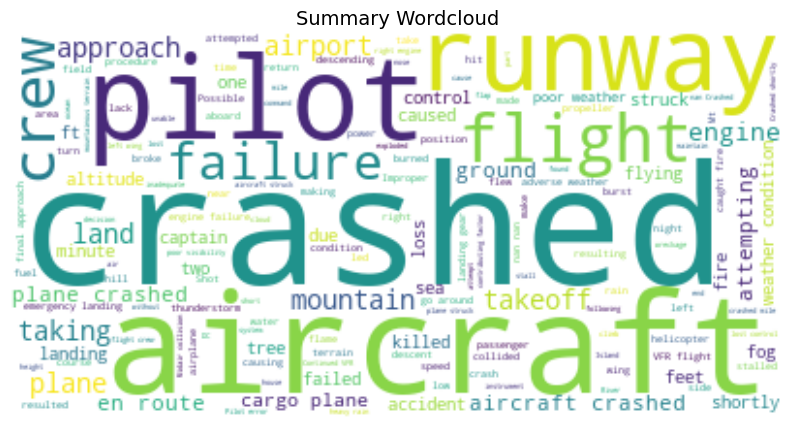

In [34]:
text = str(data['Summary'].tolist())

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Summary Wordcloud', loc='Center', fontsize=14)
plt.show()

**Observations**:

- **Pilot**, **flight**, **aircraft**, **plane**, and **crashed** are some of the most occurring words in the summaries. We can remove them and try again to get better information.

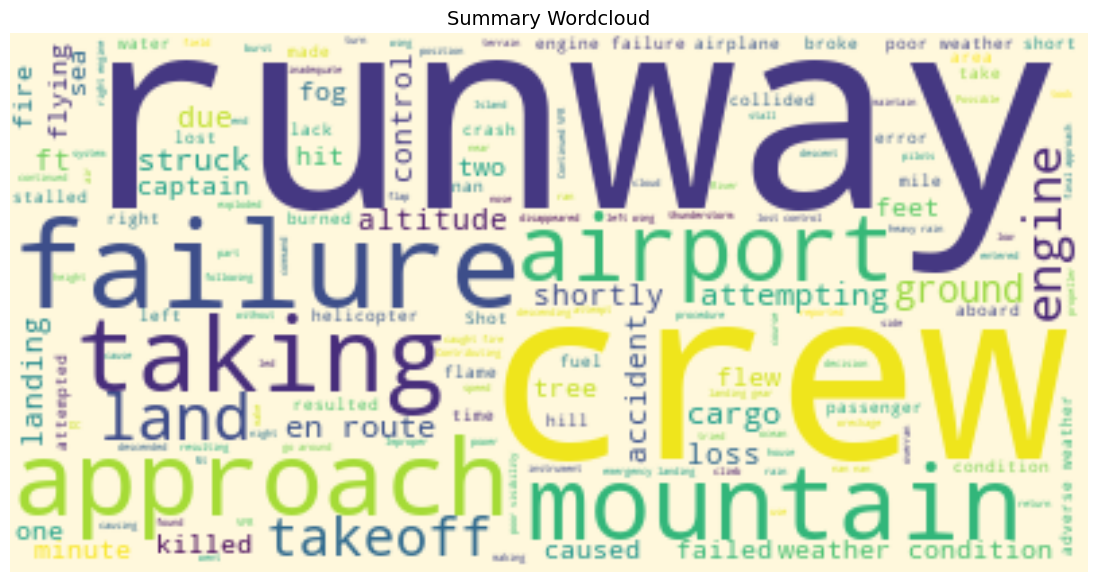

In [36]:
# plane_mask = np.array(Image.open('/content/plane.png'))

text = str(data['Summary'].tolist())

stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('pilot')
stopwords.add('flight')
stopwords.add('crashed')

wc = WordCloud(background_color = 'cornsilk', stopwords = stopwords).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Summary Wordcloud', loc='Center', fontsize=14)
plt.show()

- We can see **crew, approach, runway, landing, takeoff, weather conditions, short runway, failure, mountain, stalled**, and **engine failure** as come of the commonly occuring words in the summary.

- This information can give a **small idea** of the **reasons** that caused the **crashes**.

---
<a name = Section9></a>
# **9. Summarization**
---




<a name = Section91></a>
### **9.1 Conclusion**

- The number of crashes **peaked in 1972** and have sustained **below 100** after that, with minimum crashes in 1983 (61 crashes).

- We need to observe here that **number of airlines** have kept on **increasing** over the years, and yet the number of **crashes are consistent**.

- Even though **fatalities increase** over the years, we don't have enough data like **number of passengers** over the years that used air transport to check the **true rate of fatalities**.

- Most of the crashes are from **passenger airlines** in the dataset.

- The winter months of **December** and **January** have seen the **most number of crashes**.

- **AEROFLOT**, a Russian airline and **US Air Force** have seen the most number of crashes, with **more than 150 crashes each**.

- These two operators are responsible for **most fatalities** as well.

- For Aeroflot, the number of crashes **peaked in the 1970s** but gradually came down with a **no crashes** recorded between **1996 and 2008**.

- **Most of the notable crashes** are in the **USA** but we can observe many crashes in **Brazil** and **Russia** as well.

- Many commonly occuring words from the **crash summary** are **crew, approach, runway, landing, takeoff, weather conditions, short runway, failure, mountain, stalled**, and **engine failure** which can be used as a basis to indicate the reasons for crashes.

<a name = Section92></a>
### **9.2 Actionable Insights**

- The institute needs to provide **additional information** about the **total number of passengers** that took air transport.

- **More accurate data**, collated from other sources can also be useful for further analyses. A column like reason of crash can help a lot to cluster the various reasons of crashes.

- Some observations are based on **assumptions** for the **military aircrafts**, we need **more data** on **military aircraft crash** information as well. Although it is unlikely.

- Since we have the information of crashes from **2008-2021**, we can use that data for testing by **training a ARIMA model** for timeseries prediction. This can help to estimate the future crashes and concerns.

- There are total 11164 aviation accidents according to google till date. It is true that our data limits us till 2008, but it would be essential to  know about the more recent incidents.